# Costa Rican Household Poverty Level Prediction
## ECE 143 Group 7

### Import csv data and preprocessing

In [1]:
import preprossing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

training = preprossing.get_training_set()
test = preprossing.get_test_set()
assert not training.empty
assert not test.empty

In [2]:
col_descrip = preprossing.read_var()

### Group the DataFrame by 4 imcome types

In [3]:
grp = training.groupby('Target')
g1 = grp.get_group(1)
g2 = grp.get_group(2)
g3 = grp.get_group(3)
g4 = grp.get_group(4)


grp.count()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
Target,,,,,,,,,,,,,,,,,,,,,
1,755,153,755,755,755,755,755,755,755,755,...,755,755,755,755,755,755,755,755,755,755
2,1597,337,1597,1597,1597,1597,1597,1597,1597,1597,...,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597
3,1209,300,1209,1209,1209,1209,1209,1209,1209,1209,...,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209
4,5996,1907,5996,5996,5996,5996,5996,5996,5996,5996,...,5996,5996,5996,5996,5996,5996,5996,5996,5991,5996


### Average number of children (0-19) and percentage of marriage

In [4]:
def print_avg(col_name):
    """
    Prints sum / number of data entries
    :param col_name: name of the column to operate on
    :type col_name: str
    """
    assert isinstance(col_name, str)
    print('Income group 1  ',end=''); print(g1[col_name].sum() / g1.shape[0])
    print('Income group 2  ',end=''); print(g2[col_name].sum() / g2.shape[0])
    print('Income group 3  ',end=''); print(g3[col_name].sum() / g3.shape[0])
    print('Income group 4  ',end=''); print(g4[col_name].sum() / g4.shape[0])
    

print('Average number of children')
print_avg('hogar_nin')
print('\nPercentage of marriage')
print_avg('estadocivil3')

Average number of children
Income group 1  2.3086092715231787
Income group 2  2.0206637445209767
Income group 3  1.6724565756823822
Income group 4  1.0758839226150767

Percentage of marriage
Income group 1  0.1695364238410596
Income group 2  0.17470256731371323
Income group 3  0.24234904880066171
Income group 4  0.3110406937958639


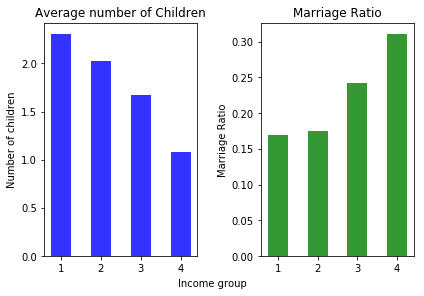

In [5]:
fig, axes = plt.subplots(1,2)
bar_width = 0.5
opacity = 0.8
index = [1,2,3,4]
avg_child = [ig['hogar_nin'].sum()/ig.shape[0] for ig in [g1,g2,g3,g4]]
marriage_perc = [ig['estadocivil3'].sum()/ig.shape[0] for ig in [g1,g2,g3,g4]]

axes[0].bar(index, avg_child, bar_width, alpha=opacity, color='b')
axes[0].set_title('Average number of Children'); axes[0].set_ylabel('Number of children')

axes[1].bar(index, marriage_perc, bar_width, alpha=opacity, color='g')
axes[1].set_title('Marriage Ratio'); axes[1].set_ylabel('Marriage Ratio')

fig.text(0.5, 0, 'Income group', ha='center', va='center')
fig.tight_layout()

### Monthly rent (if applicable)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(542.92,0.5,'Monthly Rent')

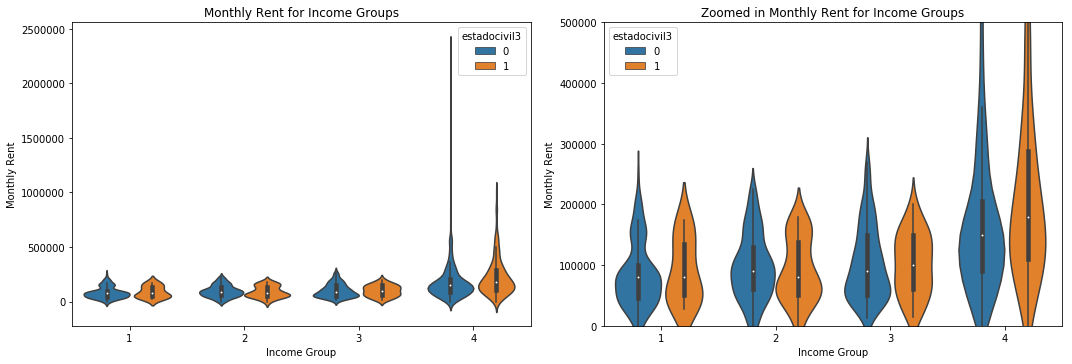

In [6]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
p1 = sns.violinplot(ax = axes[0], x="Target", y="v2a1", hue='estadocivil3', data=training, legend_out=True)
p2 = sns.violinplot(ax = axes[1], x="Target", y="v2a1", hue='estadocivil3', data=training, legend_out=True)
axes[1].set_ylim(0,500000)
fig.tight_layout()
axes[0].set_title('Monthly Rent for Income Groups'); axes[0].set_xlabel('Income Group'); axes[0].set_ylabel('Monthly Rent')
axes[1].set_title('Zoomed in Monthly Rent for Income Groups'); axes[1].set_xlabel('Income Group'); axes[1].set_ylabel('Monthly Rent')

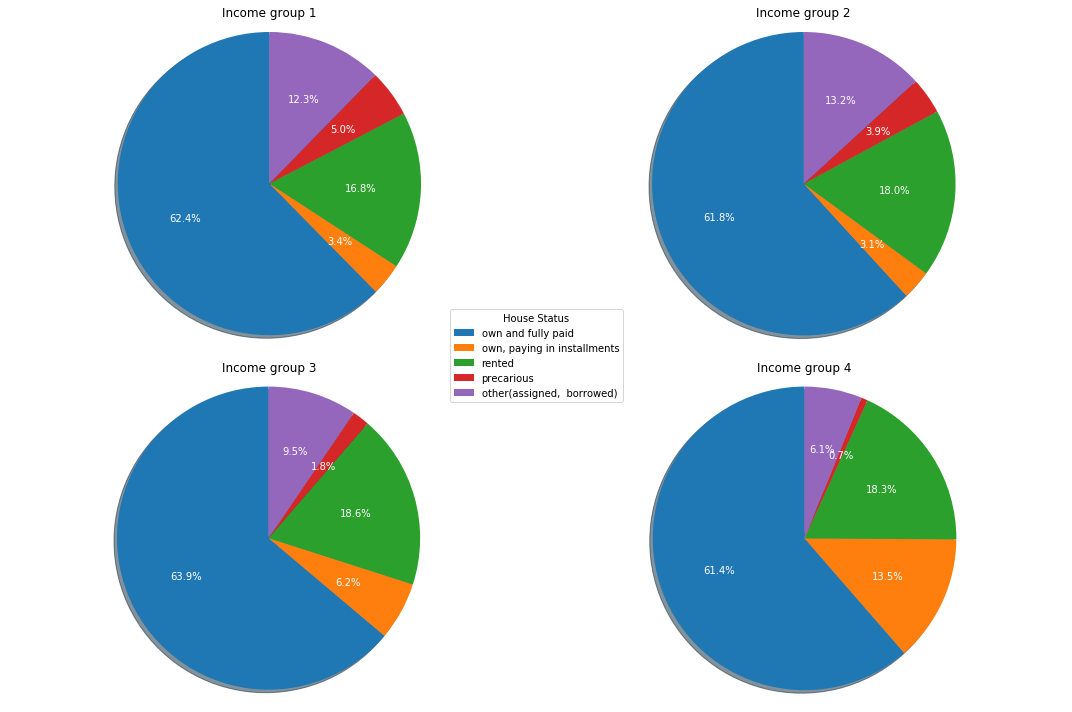

In [7]:
# tipovivi1, =1 own and fully paid house
# tipovivi2, =1 own,  paying in installments
# tipovivi3, =1 rented
# tipovivi4, =1 precarious
# tipovivi5, =1 other(assigned,  borrowed)

def house_status(group_df,ax):
    """
    Count and plot the housing payments type percentage of each income level group
    :param group_df: Dataframe of the imcome group
    :type group_df: pandas DataFrame
    :param ax: Axis to be plotted on
    :type ax: pyplot axis
    :return: pie plot wedges and labels for legend
    """
    g_length = group_df['tipovivi1'].shape[0]
    g_cond = [group_df[col].value_counts().sort_index() for col in ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']]
    sizes = [g_type[1]/g_length for g_type in g_cond]
    labels = 'own and fully paid', 'own, paying in installments', 'rented', 'precarious', 'other(assigned,  borrowed)'
    wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90,textprops=dict(color="w"))
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    return wedges, labels
    

fig, axes = plt.subplots(2,2)
house_status(g1,axes[0,0])
house_status(g2,axes[0,1])
house_status(g3,axes[1,0])
wed, lbl = house_status(g4,axes[1,1])
fig.legend(wed, lbl,
      title="House Status",
      loc="center")
axes[0,0].set_title('Income group 1');axes[0,1].set_title('Income group 2')
axes[1,0].set_title('Income group 3');axes[1,1].set_title('Income group 4')
fig.set_size_inches(15, 10)
fig.tight_layout()

### Group into households

Number of households is: 2988
Number of household heads is: 2973


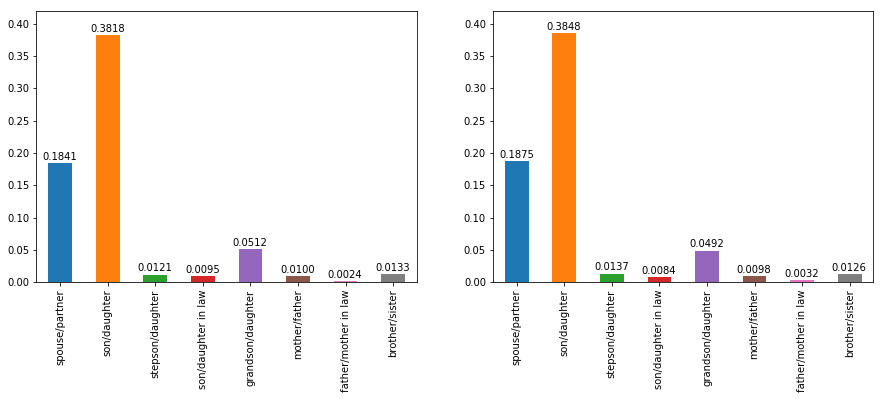

In [8]:
households = training.groupby('idhogar')
household_ids = households.groups.keys()
print(f'Number of households is: {len(household_ids)}')
household_heads = training['parentesco1'].sum()
print(f'Number of household heads is: {household_heads}')
# def count_in_households(column_name, household_id, data_grouped):
#     """
#     Count number of column_name in the household_idm, from dataset grouped by households, data_grouped
#     :param column_name: Name of the column counting from the dataset, in string
#     :type column_name: string
#     :param household_id: Household group ID
#     :type household_id: string
#     :param data_grouped: Dataset to work on
#     :type data_grouped: Pandas group
#     """
#     assert isinstance(column_name, str)
#     assert isinstance(household_id, str)
#     assert isinstance(data_grouped, pd.core.groupby.DataFrameGroupBy)
#     assert household_id in data_grouped.groups.keys()
#     household_df = data_grouped.get_group(household_id)
#     return household_df[column_name].sum()
    


# parents_count = pd.Series([count_in_households('parentesco7', hh_id, households) for hh_id in household_ids]).value_counts()
# parents_count = [count_in_households('parentesco7', hh_id, households) for hh_id in household_ids]

constitution_cols = ['parentesco2','parentesco3','parentesco4','parentesco5','parentesco6','parentesco7','parentesco8','parentesco9']
fig, axes = plt.subplots(1,2, figsize=(15,5))
training[constitution_cols].mean().plot.bar(ax=axes[0])
test[constitution_cols].mean().plot.bar(ax=axes[1])
for ax_index in range(len(axes)):
    axes[ax_index].set_ylim(0,0.42)
    for bar in axes[ax_index].patches:
        axes[ax_index].annotate(f'{bar.get_height():.4f}', (bar.get_x() - bar.get_width()/4, bar.get_height()+0.005))
    axes[ax_index].set_xticklabels([col_descrip[keys][6:] for keys in constitution_cols]);

In [9]:
households_with_parents = households['parentesco7'].any()
households_with_parents_child = (households['parentesco7'].any() & households['parentesco3'].any())
print(f'There are {households_with_parents.sum()} households containing parents\n{households_with_parents_child.sum()} of them has son/daughter(s)')


There are 90 households containing parents
56 of them has son/daughter(s)


### Plot the age of parents when they have first child
Filter out households containing both parents and son/daughters, then subtract `parent's age` by the `oldest son/daughter's age`, then make a plot.

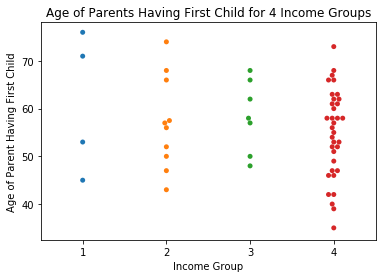

In [10]:
households = training.groupby('idhogar')
# Filter out households containing both parents and son/daughters
filt_indivisuals = households.filter(lambda x: x['parentesco7'].any() & x['parentesco3'].any())
filt_households = filt_indivisuals.groupby(['idhogar', 'parentesco7', 'parentesco3'])
filt_household_ids = filt_indivisuals.groupby('idhogar').groups.keys()

# Create DataFrame for calculation
household_parent_child_stat = pd.DataFrame({'household_id': list(filt_household_ids),
                                            'parents_age_avg': [
                                                filt_households.get_group((household_id, 1, 0))['age'].mean() for
                                                household_id in filt_household_ids],
                                            'son_daughter_age_avg': [
                                                filt_households.get_group((household_id, 0, 1))['age'].max() for
                                                household_id in filt_household_ids],
                                            'Income Group': [
                                                filt_households.get_group((household_id, 1, 0))['Target'].values[0] for
                                                household_id in filt_household_ids]})
household_parent_child_stat['Age of Parent Having First Child'] = household_parent_child_stat['parents_age_avg'] - \
                                                                  household_parent_child_stat['son_daughter_age_avg']

sns.swarmplot(x='Income Group', y='Age of Parent Having First Child', data=household_parent_child_stat)
plt.title('Age of Parents Having First Child for 4 Income Groups');


#### Test set

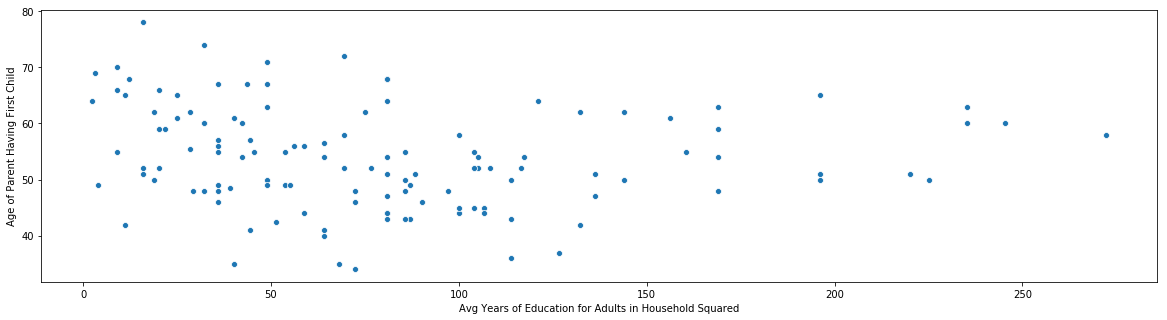

In [11]:
households = test.groupby('idhogar')
# Filter out households containing both parents and son/daughters
filt_indivisuals = households.filter(lambda x: x['parentesco7'].any() & x['parentesco3'].any())
filt_households = filt_indivisuals.groupby(['idhogar', 'parentesco7', 'parentesco3'])
filt_household_ids = filt_indivisuals.groupby('idhogar').groups.keys()

# Create DataFrame for calculation
household_parent_child_stat = pd.DataFrame({'household_id': list(filt_household_ids),
                                            'parents_age_avg': [
                                                filt_households.get_group((household_id, 1, 0))['age'].mean() for
                                                household_id in filt_household_ids],
                                            'son_daughter_age_avg': [
                                                filt_households.get_group((household_id, 0, 1))['age'].max() for
                                                household_id in filt_household_ids],
                                            'Avg Years of Education for Adults in Household Squared': [
                                                filt_households.get_group((household_id, 1, 0))['SQBmeaned'].values[0] for
                                                household_id in filt_household_ids]})
household_parent_child_stat['Age of Parent Having First Child'] = household_parent_child_stat['parents_age_avg'] - \
                                                                  household_parent_child_stat['son_daughter_age_avg']
fig, ax = plt.subplots(figsize=(20,5))
sns.scatterplot(x='Avg Years of Education for Adults in Household Squared', y='Age of Parent Having First Child', data=household_parent_child_stat)
# plt.title('Age of Parents Having First Child for 4 Income Groups');

### Average number of people per household for 4 income groups

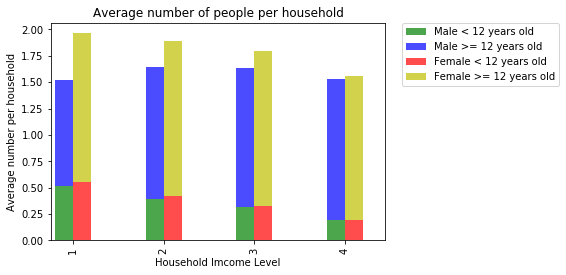

In [12]:
# r4h1, Males younger than 12 years of age
# r4h2, Males 12 years of age and older
# r4m1, Females younger than 12 years of age
# r4m2, Females 12 years of age and older
households = training.groupby('idhogar')
household_member = households.first()[['r4h1', 'r4h2', 'r4m1', 'r4m2', 'Target']]
household_member_g = household_member.groupby('Target').mean()


fig, ax = plt.subplots()
household_member_g[['r4h1', 'r4h2']].plot.bar(stacked=True, width=0.2, position=1, ax=ax, color=['g','b'], alpha=0.7)
household_member_g[['r4m1', 'r4m2']].plot.bar(stacked=True, width=0.2, position=0, ax=ax, color=['r','y'], alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=['Male < 12 years old','Male >= 12 years old','Female < 12 years old','Female >= 12 years old'])
plt.xlabel('Household Imcome Level'); plt.ylabel('Average number per household'); plt.title('Average number of people per household')
plt.show()

### Region Exploration
<img src="https://image.slidesharecdn.com/sociales-151013022512-lva1-app6891/95/resumen-estudios-sociales-de-regiones-de-costa-rica-1-638.jpg?cb=1444704104">

In [13]:
regions = {'lugar1': 'Central Valley',
           'lugar2': 'North Pacific',
           'lugar3': 'Central Pacific',
           'lugar4': 'South Pacific',
           'lugar5': 'Caribic',
           'lugar6': 'Northern Plains'}


### Years of education for male/female household heads vs. rent

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0,0.5,'Monthly Rent')

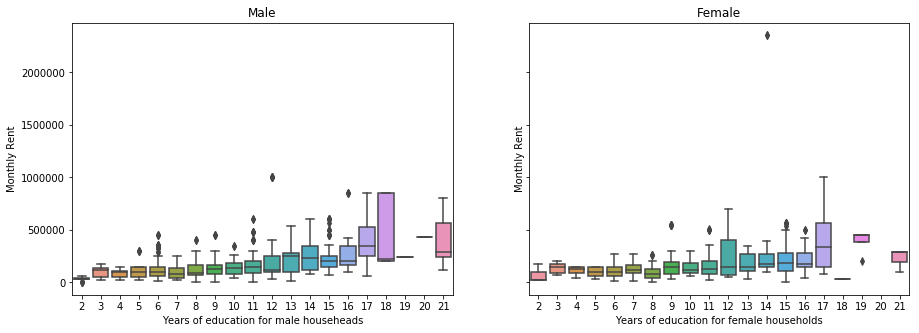

In [14]:
male_head_education = training.loc[~training['edjefe'].isin(['yes', 'no'])] # Choose valid rows
male_head_education['edjefe'] = male_head_education['edjefe'].astype('int64') # Convert to int
female_head_education = training.loc[~training['edjefa'].isin(['yes', 'no'])] # Choose valid rows
female_head_education['edjefa'] = female_head_education['edjefa'].astype('int64') # Convert to int
fig, axes = plt.subplots(1,2,sharey=True,figsize=(15,5))
sns.boxplot(x='edjefe', y='v2a1', data=male_head_education, ax=axes[0]); axes[0].set_title('Male'); axes[0].set_xlabel('Years of education for male househeads'); axes[0].set_ylabel('Monthly Rent')
sns.boxplot(x='edjefa', y='v2a1', data=female_head_education, ax=axes[1]); axes[1].set_title('Female'); axes[1].set_xlabel('Years of education for female households'); axes[1].set_ylabel('Monthly Rent')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


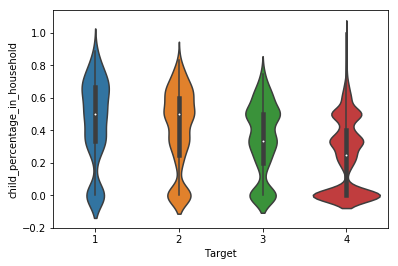

In [15]:
training['child_percentage_in_household'] = training['hogar_nin'] / training['hogar_total']
sns.violinplot(x='Target', y='child_percentage_in_household', data=training)

In [16]:
def four_target_kde_plot(df, col_name, ax):
    poverty_color = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}
    poverty_legend = {1: 'extreme', 2: 'moderate', 3: 'vulnerable',4: 'non vulnerable'}
    for poverty_level, color in poverty_color.items():
        sns.kdeplot(df.loc[df['Target'] == poverty_level, col_name].dropna(),
                    ax=ax, color=color, label=poverty_legend[poverty_level])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 1)

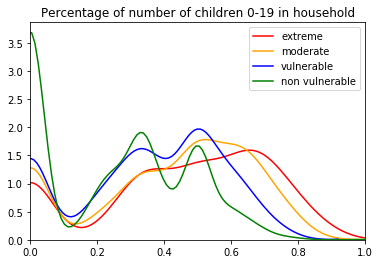

In [17]:
fig, ax = plt.subplots()        
four_target_kde_plot(training, 'child_percentage_in_household', ax)
ax.set_title('Percentage of number of children 0-19 in household')
ax.set_xlim(0,1)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 11.416719380676442)

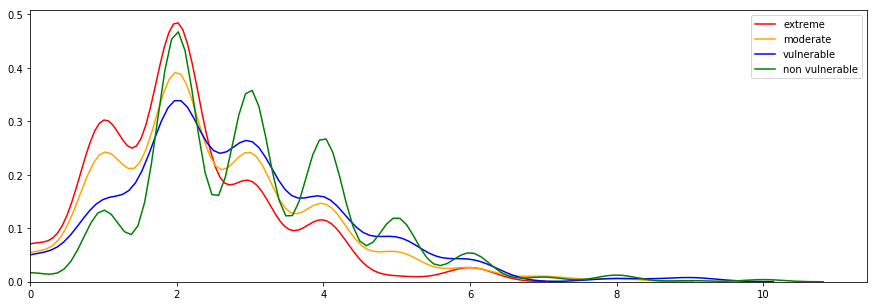

In [18]:
# qmobilephone
fig, ax = plt.subplots(figsize=(15,5)) 
four_target_kde_plot(training, 'qmobilephone', ax)
ax.set_xlim(0)

In [19]:
def four_target_dist_plot(df, col_name, ax):
    poverty_color = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}
    poverty_legend = {1: 'extreme', 2: 'moderate', 3: 'vulnerable',4: 'non vulnerable'}
    for poverty_level, color in poverty_color.items():
        sns.distplot(df.loc[df['Target'] == poverty_level, col_name].dropna(),
                    ax=ax, color=color, label=poverty_legend[poverty_level])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 14.976697601087837)

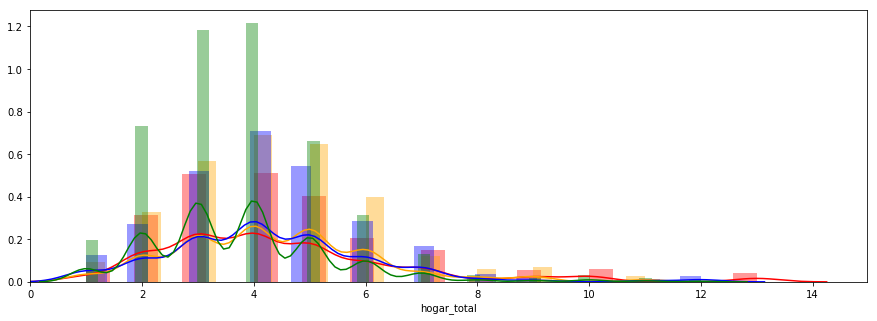

In [20]:
# hogar_total
fig, ax = plt.subplots(figsize=(15,5)) 
four_target_dist_plot(training, 'hogar_total', ax)
ax.set_xlim(0)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 14.976697601087837)

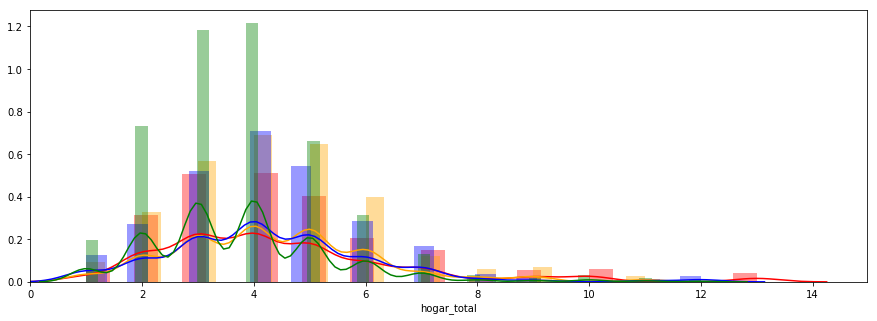

In [21]:
# hogar_total
fig, ax = plt.subplots(figsize=(15,5)) 
four_target_dist_plot(training, 'hogar_total', ax)
ax.set_xlim(0)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 41.39456975006272)

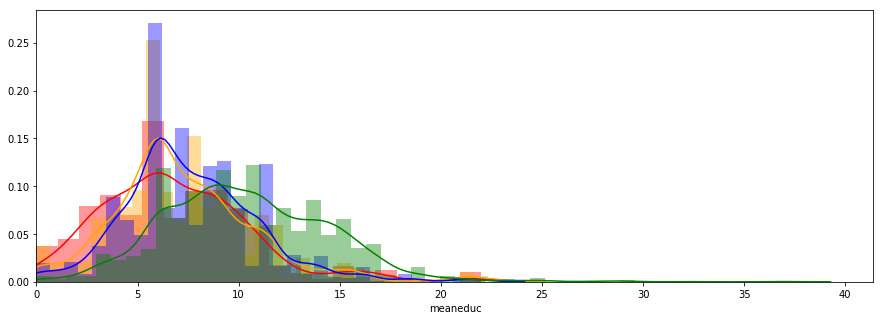

In [22]:
# hogar_total
fig, ax = plt.subplots(figsize=(15,5)) 
four_target_dist_plot(training, 'meaneduc', ax)
ax.set_xlim(0)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


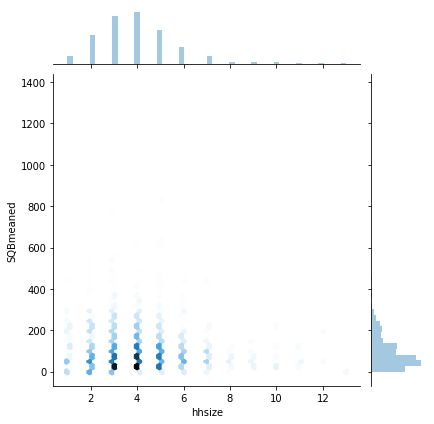

In [23]:
sns.jointplot(x='hhsize',y='SQBmeaned',data=training, kind='hex')

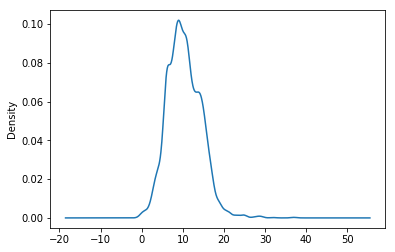

In [24]:
g4['meaneduc'].plot.kde()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


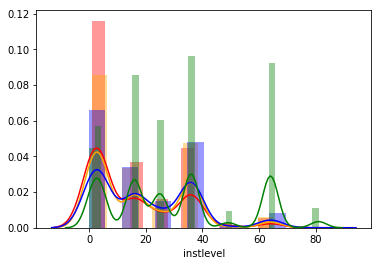

In [25]:
training['instlevel'] = training['instlevel1'] * 1 + training['instlevel2'] * 2 + training['instlevel3'] * 3 + training['instlevel3'] * 3 + training['instlevel4'] * 4 + training['instlevel5'] * 5 + training['instlevel6'] * 6 + training['instlevel7'] * 7 + training['instlevel8'] * 8 + training['instlevel9'] * 9
training['instlevel'] = training['instlevel'] ** 2
# # sns.barplot(instlevel)
# training.groupby('instlevel')
# # sns.distplot('instlevel')

# instlevel
training[['instlevel1', 'instlevel']]
fig, ax = plt.subplots()
four_target_dist_plot(training,'instlevel',ax)


